# Rsi_Score 를 활용한 백테스팅

### buy = 0, sell = 0

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install finterstellar

data = pd.read_csv('POSCO_19_21.csv', encoding = 'euc-kr')

     |████████████████████████████████| 109 kB 5.6 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,303500,0,0.00,303000,311500,303000,908019,2.790520e+11,3.805770e+13,125395903
1,2018-07-03,303000,-500,-0.16,307500,308500,299000,614716,1.865190e+11,3.799500e+13,125395903
2,2018-07-04,291500,-11500,-3.80,301000,302500,290500,735433,2.171090e+11,3.655290e+13,125395903
3,2018-07-05,282000,-9500,-3.26,292500,294500,277500,1022915,2.906150e+11,3.536160e+13,125395903
4,2018-07-06,289500,7500,2.66,283000,293000,278000,767023,2.183380e+11,3.630210e+13,125395903
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,204000,3000,1.49,200000,205000,199500,906195,1.839880e+11,2.814120e+13,137947128
862,2021-12-28,216000,12000,5.88,204500,216000,204000,1974215,4.169950e+11,2.979660e+13,137947128
863,2021-12-29,201000,-11000,-5.19,207500,208000,200500,1631108,3.325330e+11,2.772740e+13,137947128
864,2021-12-30,198000,-3000,-1.49,202000,202000,198000,780889,1.556390e+11,2.731350e+13,137947128


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)

EMA(data)

# MACD(data)

# Bollinger(data)

#단순 이동 평균선 30일
SMA(data)

# RSI 생성
RSI(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI
0,2018-07-02,303500,303000,311500,303000,908019,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,303000,307500,308500,299000,614716,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,291500,301000,302500,290500,735433,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,282000,292500,294500,277500,1022915,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,289500,283000,293000,278000,767023,293900.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,50.943396
862,2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,62.318841
863,2021-12-29,201000,207500,208000,200500,1631108,204600.0,206250.0,211883.333333,241100.000000,39.130435
864,2021-12-30,198000,202000,202000,198000,780889,204000.0,205500.0,211650.000000,240529.166667,39.130435


In [ ]:
# 1. 30 이하는 매수 (현재보다 다음날이 클 경우 매수 나머지는 보류)
# 2. 30 ~ 70 사이는 전부 보류
# 3. 70 이상은 매도

def RSI_Score_back(df):
  box = []
  for i in range(len(df)-1):
    if df.iloc[i]['RSI'] <= 30:
      if df.iloc[i]['RSI'] < df.iloc[i+1]['RSI']:
        box.append(1)
      else:
        box.append(0)
    elif df.iloc[i]['RSI'] > 70:
        box.append(-1)
    else:
        box.append(0)
  box.append(0)
  df['Rsi_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
RSI_Score_back(data)

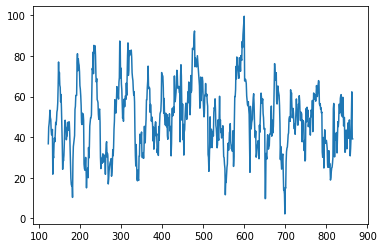

In [ ]:
plt.plot(data['RSI'])

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       742 non-null    datetime64[ns]
 1   Close      742 non-null    int64         
 2   Open       742 non-null    int64         
 3   High       742 non-null    int64         
 4   Low        742 non-null    int64         
 5   Volume     742 non-null    int64         
 6   ma5        742 non-null    float64       
 7   ma20       742 non-null    float64       
 8   ma60       742 non-null    float64       
 9   ma120      742 non-null    float64       
 10  RSI        742 non-null    float64       
 11  Rsi_Score  742 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 75.4 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      742 non-null    int64  
 1   Open       742 non-null    int64  
 2   High       742 non-null    int64  
 3   Low        742 non-null    int64  
 4   Volume     742 non-null    int64  
 5   ma5        742 non-null    float64
 6   ma20       742 non-null    float64
 7   ma60       742 non-null    float64
 8   ma120      742 non-null    float64
 9   RSI        742 non-null    float64
 10  Rsi_Score  742 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 69.6 KB


In [ ]:

import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Rsi_Score', buy=0, sell=0)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24     buy
2021-12-27     buy
2021-12-28     buy
2021-12-29     buy
2021-12-30     buy
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    ll
2021-12-27    ll
2021-12-28    ll
2021-12-29    ll
2021-12-30    ll
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

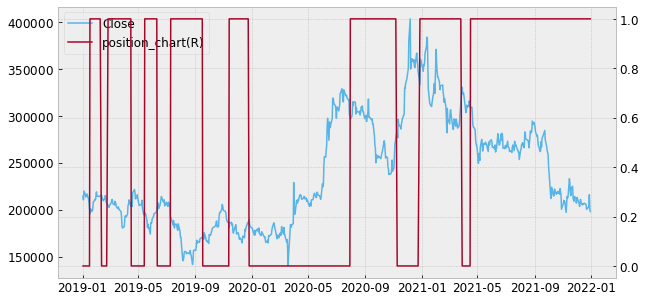

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI,Rsi_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,36.725664,0,zero,,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,44.864865,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9814
2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,46.596859,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,49.171271,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9818
2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,53.293413,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,39.622642,0,buy,ll,1,1.0,1.000000,0.681602,-31.84,0.5616,0.4981
2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,50.943396,0,buy,ll,1,1.0,1.014925,0.691775,-30.82,0.5700,0.5056
2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,62.318841,0,buy,ll,1,1.0,1.058824,0.732468,-26.75,0.6035,0.5353


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: -12.46%
Accumulated return: -32.86%
Average return: 0.80%
Benchmark return : -7.69%
Number of trades: 8
Number of win: 4
Hit ratio: 50.00%
Investment period: 3.0yrs
Sharpe ratio: -0.36
MDD: -44.96%
Benchmark MDD: -51.18%


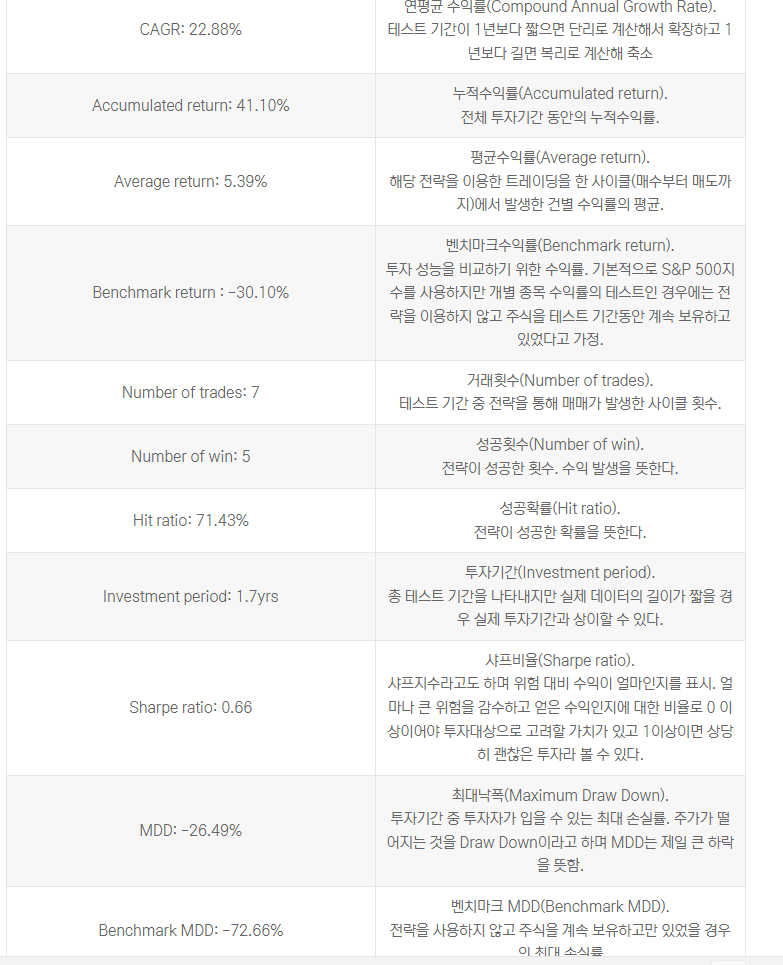

## buy = -0.5, sell = 0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('POSCO_19_21.csv', encoding = 'euc-kr')

In [ ]:
Rename(data)

,Date,Close,Open,High,Low,Volume
0,2018-07-02,303500,303000,311500,303000,908019
1,2018-07-03,303000,307500,308500,299000,614716
2,2018-07-04,291500,301000,302500,290500,735433
3,2018-07-05,282000,292500,294500,277500,1022915
4,2018-07-06,289500,283000,293000,278000,767023
...,...,...,...,...,...,...
861,2021-12-27,204000,200000,205000,199500,906195
862,2021-12-28,216000,204500,216000,204000,1974215
863,2021-12-29,201000,207500,208000,200500,1631108
864,2021-12-30,198000,202000,202000,198000,780889


In [ ]:
EMA(data)

# MACD(data)

# Bollinger(data)

#단순 이동 평균선 30일
SMA(data)

# RSI 생성
RSI(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI
0,2018-07-02,303500,303000,311500,303000,908019,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,303000,307500,308500,299000,614716,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,291500,301000,302500,290500,735433,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,282000,292500,294500,277500,1022915,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,289500,283000,293000,278000,767023,293900.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,50.943396
862,2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,62.318841
863,2021-12-29,201000,207500,208000,200500,1631108,204600.0,206250.0,211883.333333,241100.000000,39.130435
864,2021-12-30,198000,202000,202000,198000,780889,204000.0,205500.0,211650.000000,240529.166667,39.130435


In [ ]:
# 1. 30 이하는 매수 (현재보다 다음날이 클 경우 매수 나머지는 보류)
# 2. 30 ~ 70 사이는 전부 보류
# 3. 70 이상은 매도

def RSI_Score_back(df):
  box = []
  for i in range(len(df)-1):
    if df.iloc[i]['RSI'] <= 30:
      if df.iloc[i]['RSI'] < df.iloc[i+1]['RSI']:
        box.append(1)
      else:
        box.append(0)
    elif df.iloc[i]['RSI'] > 70:
        box.append(-1)
    else:
        box.append(0)
  box.append(0)
  df['Rsi_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
RSI_Score_back(data)

In [ ]:
data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI,Rsi_Score
123,2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,36.725664,0
124,2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,44.864865,0
125,2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,46.596859,0
126,2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,49.171271,0
127,2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,53.293413,0
...,...,...,...,...,...,...,...,...,...,...,...,...
860,2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,39.622642,0
861,2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,50.943396,0
862,2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,62.318841,0
863,2021-12-29,201000,207500,208000,200500,1631108,204600.0,206250.0,211883.333333,241100.000000,39.130435,0


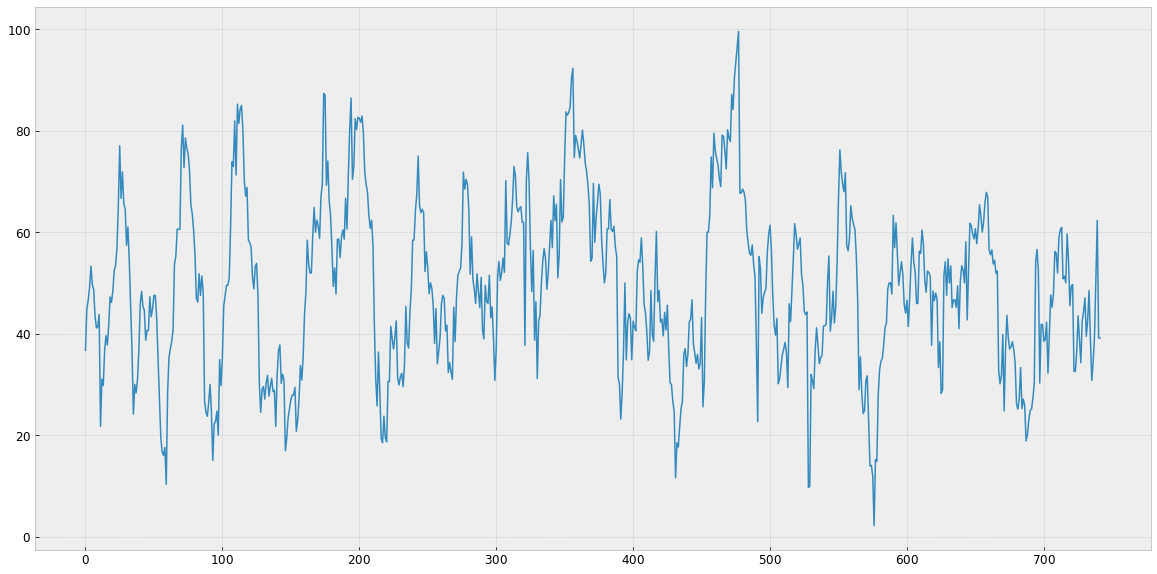

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.plot(range(len(data)),data['RSI'])
plt.show()

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       742 non-null    datetime64[ns]
 1   Close      742 non-null    int64         
 2   Open       742 non-null    int64         
 3   High       742 non-null    int64         
 4   Low        742 non-null    int64         
 5   Volume     742 non-null    int64         
 6   ma5        742 non-null    float64       
 7   ma20       742 non-null    float64       
 8   ma60       742 non-null    float64       
 9   ma120      742 non-null    float64       
 10  RSI        742 non-null    float64       
 11  Rsi_Score  742 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 75.4 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      742 non-null    int64  
 1   Open       742 non-null    int64  
 2   High       742 non-null    int64  
 3   Low        742 non-null    int64  
 4   Volume     742 non-null    int64  
 5   ma5        742 non-null    float64
 6   ma20       742 non-null    float64
 7   ma60       742 non-null    float64
 8   ma120      742 non-null    float64
 9   RSI        742 non-null    float64
 10  Rsi_Score  742 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 69.6 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Rsi_Score', buy= -0.5, sell= 0.5)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24    zero
2021-12-27    zero
2021-12-28    zero
2021-12-29    zero
2021-12-30    zero
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    zz
2021-12-27    zz
2021-12-28    zz
2021-12-29    zz
2021-12-30    zz
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

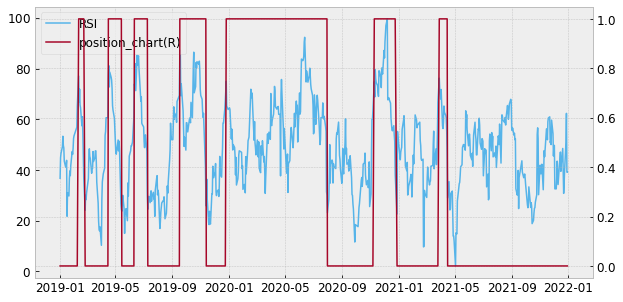

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['RSI'], right='position_chart')
plt.show()

<Figure size 1800x1080 with 0 Axes>

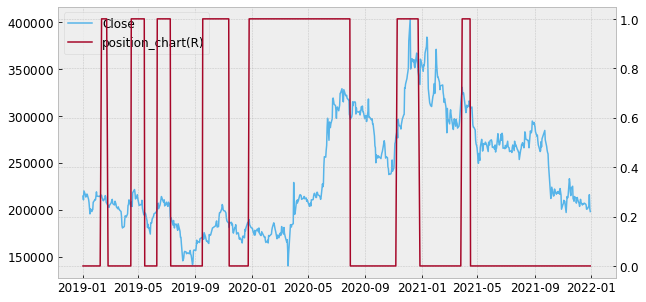

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI,Rsi_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,36.725664,0,zero,,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,44.864865,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9814
2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,46.596859,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,49.171271,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9818
2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,53.293413,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,39.622642,0,zero,zz,0,1.0,1.0,1.506296,50.63,0.7701,0.4981
2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,50.943396,0,zero,zz,0,1.0,1.0,1.506296,50.63,0.7701,0.5056
2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,62.318841,0,zero,zz,0,1.0,1.0,1.506296,50.63,0.7701,0.5353


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.01)

CAGR: 14.66%
Accumulated return: 50.63%
Average return: 7.84%
Benchmark return : -7.69%
Number of trades: 7
Number of win: 3
Hit ratio: 42.86%
Investment period: 3.0yrs
Sharpe ratio: 0.35
MDD: -35.28%
Benchmark MDD: -51.18%


## buy = 0.5, sell = -0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('POSCO_19_21.csv', encoding = 'euc-kr')

In [ ]:
Rename(data)

,Date,Close,Open,High,Low,Volume
0,2018-07-02,303500,303000,311500,303000,908019
1,2018-07-03,303000,307500,308500,299000,614716
2,2018-07-04,291500,301000,302500,290500,735433
3,2018-07-05,282000,292500,294500,277500,1022915
4,2018-07-06,289500,283000,293000,278000,767023
...,...,...,...,...,...,...
861,2021-12-27,204000,200000,205000,199500,906195
862,2021-12-28,216000,204500,216000,204000,1974215
863,2021-12-29,201000,207500,208000,200500,1631108
864,2021-12-30,198000,202000,202000,198000,780889


In [ ]:
EMA(data)

# MACD(data)

# Bollinger(data)

#단순 이동 평균선 30일
SMA(data)

# RSI 생성
RSI(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI
0,2018-07-02,303500,303000,311500,303000,908019,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,303000,307500,308500,299000,614716,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,291500,301000,302500,290500,735433,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,282000,292500,294500,277500,1022915,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,289500,283000,293000,278000,767023,293900.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,50.943396
862,2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,62.318841
863,2021-12-29,201000,207500,208000,200500,1631108,204600.0,206250.0,211883.333333,241100.000000,39.130435
864,2021-12-30,198000,202000,202000,198000,780889,204000.0,205500.0,211650.000000,240529.166667,39.130435


In [ ]:
# 1. 30 이하는 매수 (현재보다 다음날이 클 경우 매수 나머지는 보류)
# 2. 30 ~ 70 사이는 전부 보류
# 3. 70 이상은 매도

def RSI_Score_back(df):
  box = []
  for i in range(len(df)-1):
    if df.iloc[i]['RSI'] <= 30:
      if df.iloc[i]['RSI'] < df.iloc[i+1]['RSI']:
        box.append(1)
      else:
        box.append(0)
    elif df.iloc[i]['RSI'] > 70:
        box.append(-1)
    else:
        box.append(0)
  box.append(0)
  df['Rsi_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
RSI_Score_back(data)

In [ ]:
data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI,Rsi_Score
123,2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,36.725664,0
124,2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,44.864865,0
125,2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,46.596859,0
126,2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,49.171271,0
127,2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,53.293413,0
...,...,...,...,...,...,...,...,...,...,...,...,...
860,2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,39.622642,0
861,2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,50.943396,0
862,2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,62.318841,0
863,2021-12-29,201000,207500,208000,200500,1631108,204600.0,206250.0,211883.333333,241100.000000,39.130435,0


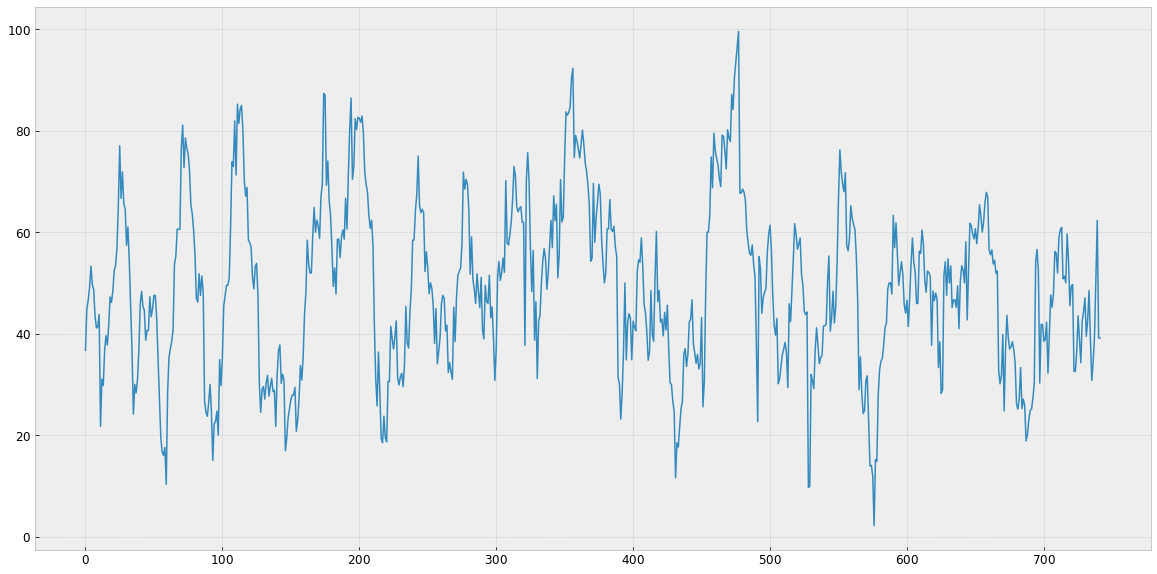

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
plt.plot(range(len(data)),data['RSI'])
plt.show()

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       742 non-null    datetime64[ns]
 1   Close      742 non-null    int64         
 2   Open       742 non-null    int64         
 3   High       742 non-null    int64         
 4   Low        742 non-null    int64         
 5   Volume     742 non-null    int64         
 6   ma5        742 non-null    float64       
 7   ma20       742 non-null    float64       
 8   ma60       742 non-null    float64       
 9   ma120      742 non-null    float64       
 10  RSI        742 non-null    float64       
 11  Rsi_Score  742 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(6)
memory usage: 75.4 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close      742 non-null    int64  
 1   Open       742 non-null    int64  
 2   High       742 non-null    int64  
 3   Low        742 non-null    int64  
 4   Volume     742 non-null    int64  
 5   ma5        742 non-null    float64
 6   ma20       742 non-null    float64
 7   ma60       742 non-null    float64
 8   ma120      742 non-null    float64
 9   RSI        742 non-null    float64
 10  Rsi_Score  742 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 69.6 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Rsi_Score', buy= 0.5, sell= -0.5)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24     buy
2021-12-27     buy
2021-12-28     buy
2021-12-29     buy
2021-12-30     buy
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    ll
2021-12-27    ll
2021-12-28    ll
2021-12-29    ll
2021-12-30    ll
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

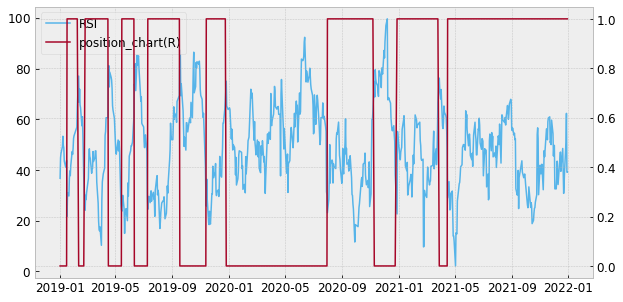

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['RSI'], right='position_chart')
plt.show()

<Figure size 1800x1080 with 0 Axes>

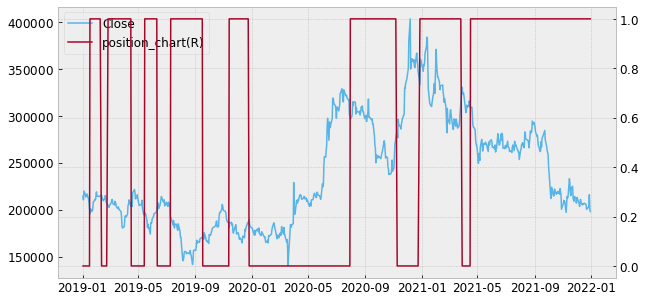

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,RSI,Rsi_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,
2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,36.725664,0,zero,,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,44.864865,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9814
2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,46.596859,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,49.171271,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9818
2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,53.293413,0,zero,zz,0,1.0,1.000000,1.000000,0.00,1.0000,0.9705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,39.622642,0,buy,ll,1,1.0,1.000000,0.681602,-31.84,0.5616,0.4981
2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,50.943396,0,buy,ll,1,1.0,1.014925,0.691775,-30.82,0.5700,0.5056
2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,62.318841,0,buy,ll,1,1.0,1.058824,0.732468,-26.75,0.6035,0.5353


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.01)

CAGR: -12.46%
Accumulated return: -32.86%
Average return: 0.80%
Benchmark return : -7.69%
Number of trades: 8
Number of win: 4
Hit ratio: 50.00%
Investment period: 3.0yrs
Sharpe ratio: -0.34
MDD: -44.96%
Benchmark MDD: -51.18%




---



---



# MACD를 활용한 백테스팅

## buy = 0, sell =0

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('POSCO_19_21.csv', encoding = 'euc-kr')

In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,303500,0,0.00,303000,311500,303000,908019,2.790520e+11,3.805770e+13,125395903
1,2018-07-03,303000,-500,-0.16,307500,308500,299000,614716,1.865190e+11,3.799500e+13,125395903
2,2018-07-04,291500,-11500,-3.80,301000,302500,290500,735433,2.171090e+11,3.655290e+13,125395903
3,2018-07-05,282000,-9500,-3.26,292500,294500,277500,1022915,2.906150e+11,3.536160e+13,125395903
4,2018-07-06,289500,7500,2.66,283000,293000,278000,767023,2.183380e+11,3.630210e+13,125395903
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,204000,3000,1.49,200000,205000,199500,906195,1.839880e+11,2.814120e+13,137947128
862,2021-12-28,216000,12000,5.88,204500,216000,204000,1974215,4.169950e+11,2.979660e+13,137947128
863,2021-12-29,201000,-11000,-5.19,207500,208000,200500,1631108,3.325330e+11,2.772740e+13,137947128
864,2021-12-30,198000,-3000,-1.49,202000,202000,198000,780889,1.556390e+11,2.731350e+13,137947128


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)

EMA(data)

MACD(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus
0,2018-07-02,303500,303000,311500,303000,908019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,303000,307500,308500,299000,614716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,291500,301000,302500,290500,735433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,282000,292500,294500,277500,1022915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,289500,283000,293000,278000,767023,293900.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,-3324.339448,-3296.709911,-27.629537
862,2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,-2165.941756,-3070.556280,904.614525
863,2021-12-29,201000,207500,208000,200500,1631108,204600.0,206250.0,211883.333333,241100.000000,-2430.263316,-2942.497687,512.234372
864,2021-12-30,198000,202000,202000,198000,780889,204000.0,205500.0,211650.000000,240529.166667,-2848.973788,-2923.792907,74.819119


In [ ]:
# MACD : 12일 이동평균 - 26일 이동평균 
# MACD_Minus : MACD - signal의 차

# 매수 시점 : MACD >0, MACD가 음수에서 양수로 변경, MACD_Minus가 양수
# 매도 시점 : MACD <0, MACD가 양수에서 음수로 변경, MACD_Minus가 음수

# 다음 날에도 상승세 or 하락세가 지속될 경우 추가 구매 없음

def MACD_Score_back(df):
  box = []
  for i in range(len(df)-1):
      if df.iloc[i]['MACD'] > 0 or df.iloc[i]['MACD_Minus'] >0:
        if df.iloc[i]['MACD'] < df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(1)
      elif df.iloc[i]['MACD'] < 0 or df.iloc[i]['MACD_Minus'] < 0:
        if df.iloc[i]['MACD'] > df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(-1)
      else:
        box.append(0)
  box.append(0)
  df['MACD_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
MACD_Score_back(data)

In [ ]:
data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus,MACD_Score
123,2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,-4077.554619,-3978.123196,-99.431422,0
124,2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,-4657.149108,-4113.928379,-543.220729,-1
125,2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,-4300.339672,-4151.210637,-149.129035,-1
126,2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,-4290.869719,-4179.142454,-111.727265,0
127,2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,-4433.981639,-4230.110291,-203.871349,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,-3532.703929,-3289.802527,-242.901401,-1
861,2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,-3324.339448,-3296.709911,-27.629537,-1
862,2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,-2165.941756,-3070.556280,904.614525,1
863,2021-12-29,201000,207500,208000,200500,1631108,204600.0,206250.0,211883.333333,241100.000000,-2430.263316,-2942.497687,512.234372,1


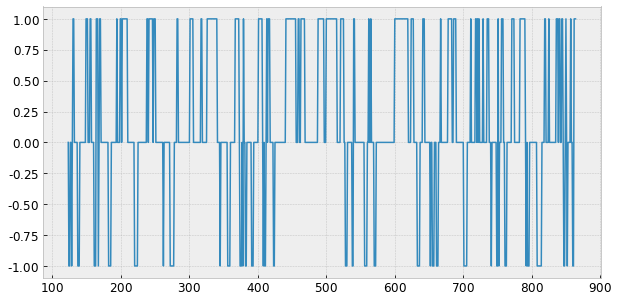

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['MACD_Score'])

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         742 non-null    datetime64[ns]
 1   Close        742 non-null    int64         
 2   Open         742 non-null    int64         
 3   High         742 non-null    int64         
 4   Low          742 non-null    int64         
 5   Volume       742 non-null    int64         
 6   ma5          742 non-null    float64       
 7   ma20         742 non-null    float64       
 8   ma60         742 non-null    float64       
 9   ma120        742 non-null    float64       
 10  MACD         742 non-null    float64       
 11  MACD_Signal  742 non-null    float64       
 12  MACD_Minus   742 non-null    float64       
 13  MACD_Score   742 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(6)
memory usage: 87.0 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        742 non-null    int64  
 1   Open         742 non-null    int64  
 2   High         742 non-null    int64  
 3   Low          742 non-null    int64  
 4   Volume       742 non-null    int64  
 5   ma5          742 non-null    float64
 6   ma20         742 non-null    float64
 7   ma60         742 non-null    float64
 8   ma120        742 non-null    float64
 9   MACD         742 non-null    float64
 10  MACD_Signal  742 non-null    float64
 11  MACD_Minus   742 non-null    float64
 12  MACD_Score   742 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 81.2 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='MACD_Score', buy=0, sell=0)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24    zero
2021-12-27    zero
2021-12-28     buy
2021-12-29     buy
2021-12-30     buy
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    lz
2021-12-27    zz
2021-12-28    zl
2021-12-29    ll
2021-12-30    ll
Name: position, Length: 742, dtype: object

In [ ]:
def draw_chart(df, left=None, right=None, log=False):
    '''
    Draw chart on each y-axis
    :param df: Dataframe that contains data to plot
    :param left: Columns to use left y-axis ticks
    :param right: Columns to use right y-axis ticks
    :param log: Plot in log scale
    :return: Line chart
    '''

    fig, ax1 = plt.subplots(figsize=(30,20))
    x = df.index
    
    if left is not None:
        left = util.str_to_list(left)
        i = 6
        for c in left:
            ax1.plot(x, df[c], label=c, color='C'+str(i), alpha=1)
            i += 1
        if log:
            ax1.set_yscale('log')
            ax1.yaxis.set_major_formatter(ScalarFormatter())
            ax1.yaxis.set_minor_formatter(ScalarFormatter())
    else:
        ax1.axes.yaxis.set_visible(False)
    # secondary y
    if right is not None:
        right = util.str_to_list(right)
        ax2 = ax1.twinx()
        i = 1
        for c in right:
            ax2.plot(x, df[c], label=c+'(R)', color='C'+str(i), alpha=1)
            ax1.plot(np.nan, label=c+'(R)', color='C'+str(i))
            i += 1
        ax1.grid(False, axis='y')
        if log:
            ax2.set_yscale('log')
            ax2.yaxis.set_major_formatter(ScalarFormatter())
            ax2.yaxis.set_minor_formatter(ScalarFormatter())
    ax1.legend(loc=2)
    # plt.setp(ax1.xaxis.get

<Figure size 1800x1080 with 0 Axes>

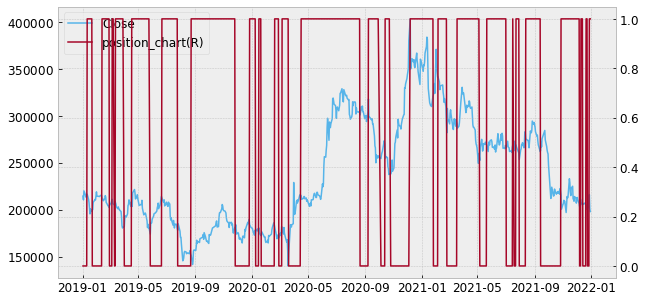

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,...,MACD_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,-4077.554619,...,0,zero,,0,1.00000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,-4657.149108,...,-1,zero,zz,0,1.00000,1.000000,1.000000,0.00,1.0000,0.9814
2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,-4300.339672,...,-1,zero,zz,0,1.00000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,-4290.869719,...,0,zero,zz,0,1.00000,1.000000,1.000000,0.00,1.0000,0.9818
2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,-4433.981639,...,0,zero,zz,0,1.00000,1.000000,1.000000,0.00,1.0000,0.9705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,-3532.703929,...,-1,zero,lz,0,0.98039,0.999900,0.215935,-78.41,0.2159,0.4981
2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,-3324.339448,...,-1,zero,zz,0,1.00000,1.000000,0.215935,-78.41,0.2159,0.5056
2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,-2165.941756,...,1,buy,zl,1,1.00000,1.000000,0.215935,-78.41,0.2159,0.5353


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: -41.78%
Accumulated return: -80.21%
Average return: -5.47%
Benchmark return : -7.69%
Number of trades: 25
Number of win: 2
Hit ratio: 8.00%
Investment period: 3.0yrs
Sharpe ratio: -1.11
MDD: -80.21%
Benchmark MDD: -51.18%


## buy = -0.5, sell = 0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('POSCO_19_21.csv', encoding = 'euc-kr')

In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,303500,0,0.00,303000,311500,303000,908019,2.790520e+11,3.805770e+13,125395903
1,2018-07-03,303000,-500,-0.16,307500,308500,299000,614716,1.865190e+11,3.799500e+13,125395903
2,2018-07-04,291500,-11500,-3.80,301000,302500,290500,735433,2.171090e+11,3.655290e+13,125395903
3,2018-07-05,282000,-9500,-3.26,292500,294500,277500,1022915,2.906150e+11,3.536160e+13,125395903
4,2018-07-06,289500,7500,2.66,283000,293000,278000,767023,2.183380e+11,3.630210e+13,125395903
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,204000,3000,1.49,200000,205000,199500,906195,1.839880e+11,2.814120e+13,137947128
862,2021-12-28,216000,12000,5.88,204500,216000,204000,1974215,4.169950e+11,2.979660e+13,137947128
863,2021-12-29,201000,-11000,-5.19,207500,208000,200500,1631108,3.325330e+11,2.772740e+13,137947128
864,2021-12-30,198000,-3000,-1.49,202000,202000,198000,780889,1.556390e+11,2.731350e+13,137947128


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)

EMA(data)

MACD(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus
0,2018-07-02,303500,303000,311500,303000,908019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,303000,307500,308500,299000,614716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,291500,301000,302500,290500,735433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,282000,292500,294500,277500,1022915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,289500,283000,293000,278000,767023,293900.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,-3324.339448,-3296.709911,-27.629537
862,2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,-2165.941756,-3070.556280,904.614525
863,2021-12-29,201000,207500,208000,200500,1631108,204600.0,206250.0,211883.333333,241100.000000,-2430.263316,-2942.497687,512.234372
864,2021-12-30,198000,202000,202000,198000,780889,204000.0,205500.0,211650.000000,240529.166667,-2848.973788,-2923.792907,74.819119


In [ ]:
# MACD : 12일 이동평균 - 26일 이동평균 
# MACD_Minus : MACD - signal의 차

# 매수 시점 : MACD >0, MACD가 음수에서 양수로 변경, MACD_Minus가 양수
# 매도 시점 : MACD <0, MACD가 양수에서 음수로 변경, MACD_Minus가 음수

# 다음 날에도 상승세 or 하락세가 지속될 경우 추가 구매 없음

def MACD_Score_back(df):
  box = []
  for i in range(len(df)-1):
      if df.iloc[i]['MACD'] > 0 or df.iloc[i]['MACD_Minus'] >0:
        if df.iloc[i]['MACD'] < df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(1)
      elif df.iloc[i]['MACD'] < 0 or df.iloc[i]['MACD_Minus'] < 0:
        if df.iloc[i]['MACD'] > df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(-1)
      else:
        box.append(0)
  box.append(0)
  df['MACD_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
MACD_Score_back(data)

In [ ]:
data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus,MACD_Score
123,2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,-4077.554619,-3978.123196,-99.431422,0
124,2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,-4657.149108,-4113.928379,-543.220729,-1
125,2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,-4300.339672,-4151.210637,-149.129035,-1
126,2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,-4290.869719,-4179.142454,-111.727265,0
127,2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,-4433.981639,-4230.110291,-203.871349,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,-3532.703929,-3289.802527,-242.901401,-1
861,2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,-3324.339448,-3296.709911,-27.629537,-1
862,2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,-2165.941756,-3070.556280,904.614525,1
863,2021-12-29,201000,207500,208000,200500,1631108,204600.0,206250.0,211883.333333,241100.000000,-2430.263316,-2942.497687,512.234372,1


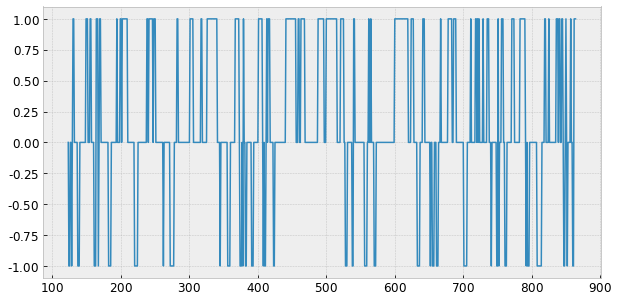

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['MACD_Score'])

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         742 non-null    datetime64[ns]
 1   Close        742 non-null    int64         
 2   Open         742 non-null    int64         
 3   High         742 non-null    int64         
 4   Low          742 non-null    int64         
 5   Volume       742 non-null    int64         
 6   ma5          742 non-null    float64       
 7   ma20         742 non-null    float64       
 8   ma60         742 non-null    float64       
 9   ma120        742 non-null    float64       
 10  MACD         742 non-null    float64       
 11  MACD_Signal  742 non-null    float64       
 12  MACD_Minus   742 non-null    float64       
 13  MACD_Score   742 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(6)
memory usage: 87.0 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        742 non-null    int64  
 1   Open         742 non-null    int64  
 2   High         742 non-null    int64  
 3   Low          742 non-null    int64  
 4   Volume       742 non-null    int64  
 5   ma5          742 non-null    float64
 6   ma20         742 non-null    float64
 7   ma60         742 non-null    float64
 8   ma120        742 non-null    float64
 9   MACD         742 non-null    float64
 10  MACD_Signal  742 non-null    float64
 11  MACD_Minus   742 non-null    float64
 12  MACD_Score   742 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 81.2 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='MACD_Score', buy=-0.5, sell=0.5)

Date
2019-01-02    zero
2019-01-03     buy
2019-01-04     buy
2019-01-07     buy
2019-01-08     buy
              ... 
2021-12-24     buy
2021-12-27     buy
2021-12-28    zero
2021-12-29    zero
2021-12-30    zero
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zl
2019-01-04    ll
2019-01-07    ll
2019-01-08    ll
              ..
2021-12-24    zl
2021-12-27    ll
2021-12-28    lz
2021-12-29    zz
2021-12-30    zz
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

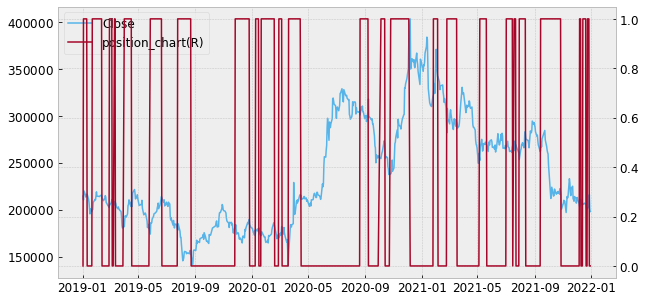

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,...,MACD_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,-4077.554619,...,0,zero,,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,-4657.149108,...,-1,buy,zl,1,1.000000,1.000000,1.000000,0.00,1.0000,0.9814
2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,-4300.339672,...,-1,buy,ll,1,1.000000,1.045131,1.045131,4.51,1.0000,1.0000
2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,-4290.869719,...,0,buy,ll,1,1.000000,0.981818,1.026128,2.61,0.9818,0.9818
2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,-4433.981639,...,0,buy,ll,1,1.000000,0.988426,1.014252,1.43,0.9705,0.9705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,-3532.703929,...,-1,buy,zl,1,1.000000,1.000000,4.400843,340.08,0.7702,0.4981
2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,-3324.339448,...,-1,buy,ll,1,1.000000,1.014925,4.466527,346.65,0.7817,0.5056
2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,-2165.941756,...,1,zero,lz,0,1.074519,1.058718,4.728791,372.88,0.8276,0.5353


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: 68.01%
Accumulated return: 372.88%
Average return: 7.47%
Benchmark return : -7.69%
Number of trades: 25
Number of win: 22
Hit ratio: 88.00%
Investment period: 3.0yrs
Sharpe ratio: 1.70
MDD: -25.48%
Benchmark MDD: -51.18%


## buy = 0.5, sell = -0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('POSCO_19_21.csv', encoding = 'euc-kr')

In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,303500,0,0.00,303000,311500,303000,908019,2.790520e+11,3.805770e+13,125395903
1,2018-07-03,303000,-500,-0.16,307500,308500,299000,614716,1.865190e+11,3.799500e+13,125395903
2,2018-07-04,291500,-11500,-3.80,301000,302500,290500,735433,2.171090e+11,3.655290e+13,125395903
3,2018-07-05,282000,-9500,-3.26,292500,294500,277500,1022915,2.906150e+11,3.536160e+13,125395903
4,2018-07-06,289500,7500,2.66,283000,293000,278000,767023,2.183380e+11,3.630210e+13,125395903
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,204000,3000,1.49,200000,205000,199500,906195,1.839880e+11,2.814120e+13,137947128
862,2021-12-28,216000,12000,5.88,204500,216000,204000,1974215,4.169950e+11,2.979660e+13,137947128
863,2021-12-29,201000,-11000,-5.19,207500,208000,200500,1631108,3.325330e+11,2.772740e+13,137947128
864,2021-12-30,198000,-3000,-1.49,202000,202000,198000,780889,1.556390e+11,2.731350e+13,137947128


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)

EMA(data)

MACD(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus
0,2018-07-02,303500,303000,311500,303000,908019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-07-03,303000,307500,308500,299000,614716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-04,291500,301000,302500,290500,735433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-05,282000,292500,294500,277500,1022915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-06,289500,283000,293000,278000,767023,293900.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,-3324.339448,-3296.709911,-27.629537
862,2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,-2165.941756,-3070.556280,904.614525
863,2021-12-29,201000,207500,208000,200500,1631108,204600.0,206250.0,211883.333333,241100.000000,-2430.263316,-2942.497687,512.234372
864,2021-12-30,198000,202000,202000,198000,780889,204000.0,205500.0,211650.000000,240529.166667,-2848.973788,-2923.792907,74.819119


In [ ]:
# MACD : 12일 이동평균 - 26일 이동평균 
# MACD_Minus : MACD - signal의 차

# 매수 시점 : MACD >0, MACD가 음수에서 양수로 변경, MACD_Minus가 양수
# 매도 시점 : MACD <0, MACD가 양수에서 음수로 변경, MACD_Minus가 음수

# 다음 날에도 상승세 or 하락세가 지속될 경우 추가 구매 없음

def MACD_Score_back(df):
  box = []
  for i in range(len(df)-1):
      if df.iloc[i]['MACD'] > 0 or df.iloc[i]['MACD_Minus'] >0:
        if df.iloc[i]['MACD'] < df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(1)
      elif df.iloc[i]['MACD'] < 0 or df.iloc[i]['MACD_Minus'] < 0:
        if df.iloc[i]['MACD'] > df.iloc[i+1]['MACD']:
          box.append(0)
        else:
          box.append(-1)
      else:
        box.append(0)
  box.append(0)
  df['MACD_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  return df

In [ ]:
MACD_Score_back(data)

In [ ]:
data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,MACD_Signal,MACD_Minus,MACD_Score
123,2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,-4077.554619,-3978.123196,-99.431422,0
124,2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,-4657.149108,-4113.928379,-543.220729,-1
125,2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,-4300.339672,-4151.210637,-149.129035,-1
126,2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,-4290.869719,-4179.142454,-111.727265,0
127,2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,-4433.981639,-4230.110291,-203.871349,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,-3532.703929,-3289.802527,-242.901401,-1
861,2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,-3324.339448,-3296.709911,-27.629537,-1
862,2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,-2165.941756,-3070.556280,904.614525,1
863,2021-12-29,201000,207500,208000,200500,1631108,204600.0,206250.0,211883.333333,241100.000000,-2430.263316,-2942.497687,512.234372,1


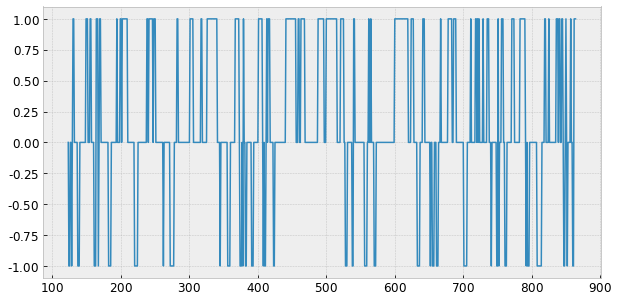

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data['MACD_Score'])

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         742 non-null    datetime64[ns]
 1   Close        742 non-null    int64         
 2   Open         742 non-null    int64         
 3   High         742 non-null    int64         
 4   Low          742 non-null    int64         
 5   Volume       742 non-null    int64         
 6   ma5          742 non-null    float64       
 7   ma20         742 non-null    float64       
 8   ma60         742 non-null    float64       
 9   ma120        742 non-null    float64       
 10  MACD         742 non-null    float64       
 11  MACD_Signal  742 non-null    float64       
 12  MACD_Minus   742 non-null    float64       
 13  MACD_Score   742 non-null    int64         
dtypes: datetime64[ns](1), float64(7), int64(6)
memory usage: 87.0 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Close        742 non-null    int64  
 1   Open         742 non-null    int64  
 2   High         742 non-null    int64  
 3   Low          742 non-null    int64  
 4   Volume       742 non-null    int64  
 5   ma5          742 non-null    float64
 6   ma20         742 non-null    float64
 7   ma60         742 non-null    float64
 8   ma120        742 non-null    float64
 9   MACD         742 non-null    float64
 10  MACD_Signal  742 non-null    float64
 11  MACD_Minus   742 non-null    float64
 12  MACD_Score   742 non-null    int64  
dtypes: float64(7), int64(6)
memory usage: 81.2 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='MACD_Score', buy=-0.5, sell=0.5)

Date
2019-01-02    zero
2019-01-03     buy
2019-01-04     buy
2019-01-07     buy
2019-01-08     buy
              ... 
2021-12-24     buy
2021-12-27     buy
2021-12-28    zero
2021-12-29    zero
2021-12-30    zero
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zl
2019-01-04    ll
2019-01-07    ll
2019-01-08    ll
              ..
2021-12-24    zl
2021-12-27    ll
2021-12-28    lz
2021-12-29    zz
2021-12-30    zz
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

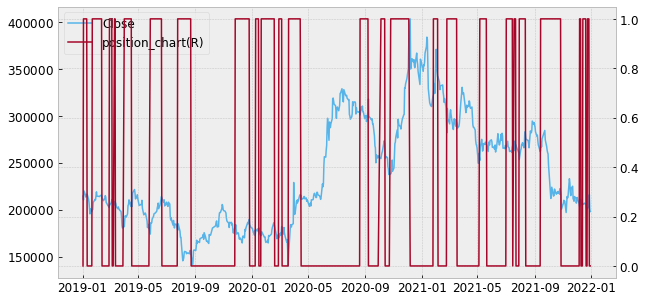

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,MACD,...,MACD_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,-4077.554619,...,0,zero,,0,1.000000,1.000000,1.000000,0.00,1.0000,1.0000
2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,-4657.149108,...,-1,buy,zl,1,1.000000,1.000000,1.000000,0.00,1.0000,0.9814
2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,-4300.339672,...,-1,buy,ll,1,1.000000,1.045131,1.045131,4.51,1.0000,1.0000
2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,-4290.869719,...,0,buy,ll,1,1.000000,0.981818,1.026128,2.61,0.9818,0.9818
2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,-4433.981639,...,0,buy,ll,1,1.000000,0.988426,1.014252,1.43,0.9705,0.9705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,-3532.703929,...,-1,buy,zl,1,1.000000,1.000000,4.400843,340.08,0.7702,0.4981
2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,-3324.339448,...,-1,buy,ll,1,1.000000,1.014925,4.466527,346.65,0.7817,0.5056
2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,-2165.941756,...,1,zero,lz,0,1.074519,1.058718,4.728791,372.88,0.8276,0.5353


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: 68.01%
Accumulated return: 372.88%
Average return: 7.47%
Benchmark return : -7.69%
Number of trades: 25
Number of win: 22
Hit ratio: 88.00%
Investment period: 3.0yrs
Sharpe ratio: 1.70
MDD: -25.48%
Benchmark MDD: -51.18%


# 정분류율을 활용한 백테스팅

### buy = 0, sell =0

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('POSCO_19_21.csv', encoding = 'euc-kr')

In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,303500,0,0.00,303000,311500,303000,908019,2.790520e+11,3.805770e+13,125395903
1,2018-07-03,303000,-500,-0.16,307500,308500,299000,614716,1.865190e+11,3.799500e+13,125395903
2,2018-07-04,291500,-11500,-3.80,301000,302500,290500,735433,2.171090e+11,3.655290e+13,125395903
3,2018-07-05,282000,-9500,-3.26,292500,294500,277500,1022915,2.906150e+11,3.536160e+13,125395903
4,2018-07-06,289500,7500,2.66,283000,293000,278000,767023,2.183380e+11,3.630210e+13,125395903
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,204000,3000,1.49,200000,205000,199500,906195,1.839880e+11,2.814120e+13,137947128
862,2021-12-28,216000,12000,5.88,204500,216000,204000,1974215,4.169950e+11,2.979660e+13,137947128
863,2021-12-29,201000,-11000,-5.19,207500,208000,200500,1631108,3.325330e+11,2.772740e+13,137947128
864,2021-12-30,198000,-3000,-1.49,202000,202000,198000,780889,1.556390e+11,2.731350e+13,137947128


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)
EMA(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120
0,2018-07-02,303500,303000,311500,303000,908019,NaN,NaN,NaN,NaN
1,2018-07-03,303000,307500,308500,299000,614716,NaN,NaN,NaN,NaN
2,2018-07-04,291500,301000,302500,290500,735433,NaN,NaN,NaN,NaN
3,2018-07-05,282000,292500,294500,277500,1022915,NaN,NaN,NaN,NaN
4,2018-07-06,289500,283000,293000,278000,767023,293900.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000
862,2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000
863,2021-12-29,201000,207500,208000,200500,1631108,204600.0,206250.0,211883.333333,241100.000000
864,2021-12-30,198000,202000,202000,198000,780889,204000.0,205500.0,211650.000000,240529.166667


In [ ]:
def Ma_Minus_back(df):
  box = []
  for i in range(len(df)):
    if (df.iloc[i]['ma5'] > df.iloc[i]['ma20']) & (df.iloc[i]['ma5'] > df.iloc[i]['ma60']) & (df.iloc[i]['ma5'] > df.iloc[i]['ma120']):
      box.append(1)
    elif (df.iloc[i]['ma5'] < df.iloc[i]['ma20']) & (df.iloc[i]['ma5'] < df.iloc[i]['ma60']) & (df.iloc[i]['ma5'] < df.iloc[i]['ma120']):
      box.append(-1)
    else: 
      box.append(0)
  df['Ma_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)  
  return df

In [ ]:
Ma_Minus_back(data)

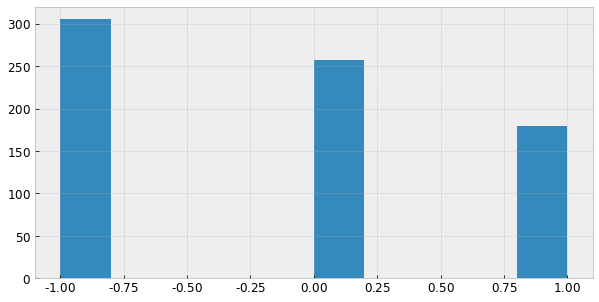

In [ ]:
import matplotlib.pyplot as plt
data['Ma_Score'].hist()

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      742 non-null    datetime64[ns]
 1   Close     742 non-null    int64         
 2   Open      742 non-null    int64         
 3   High      742 non-null    int64         
 4   Low       742 non-null    int64         
 5   Volume    742 non-null    int64         
 6   ma5       742 non-null    float64       
 7   ma20      742 non-null    float64       
 8   ma60      742 non-null    float64       
 9   ma120     742 non-null    float64       
 10  Ma_Score  742 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 69.6 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     742 non-null    int64  
 1   Open      742 non-null    int64  
 2   High      742 non-null    int64  
 3   Low       742 non-null    int64  
 4   Volume    742 non-null    int64  
 5   ma5       742 non-null    float64
 6   ma20      742 non-null    float64
 7   ma60      742 non-null    float64
 8   ma120     742 non-null    float64
 9   Ma_Score  742 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 63.8 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Ma_Score', buy=0, sell=0)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24    zero
2021-12-27    zero
2021-12-28    zero
2021-12-29    zero
2021-12-30    zero
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    zz
2021-12-27    zz
2021-12-28    zz
2021-12-29    zz
2021-12-30    zz
Name: position, Length: 742, dtype: object

In [ ]:
def draw_chart(df, left=None, right=None, log=False):
    '''
    Draw chart on each y-axis
    :param df: Dataframe that contains data to plot
    :param left: Columns to use left y-axis ticks
    :param right: Columns to use right y-axis ticks
    :param log: Plot in log scale
    :return: Line chart
    '''

    fig, ax1 = plt.subplots(figsize=(30,20))
    x = df.index
    
    if left is not None:
        left = util.str_to_list(left)
        i = 6
        for c in left:
            ax1.plot(x, df[c], label=c, color='C'+str(i), alpha=1)
            i += 1
        if log:
            ax1.set_yscale('log')
            ax1.yaxis.set_major_formatter(ScalarFormatter())
            ax1.yaxis.set_minor_formatter(ScalarFormatter())
    else:
        ax1.axes.yaxis.set_visible(False)
    # secondary y
    if right is not None:
        right = util.str_to_list(right)
        ax2 = ax1.twinx()
        i = 1
        for c in right:
            ax2.plot(x, df[c], label=c+'(R)', color='C'+str(i), alpha=1)
            ax1.plot(np.nan, label=c+'(R)', color='C'+str(i))
            i += 1
        ax1.grid(False, axis='y')
        if log:
            ax2.set_yscale('log')
            ax2.yaxis.set_major_formatter(ScalarFormatter())
            ax2.yaxis.set_minor_formatter(ScalarFormatter())
    ax1.legend(loc=2)
    # plt.setp(ax1.xaxis.get

<Figure size 1800x1080 with 0 Axes>

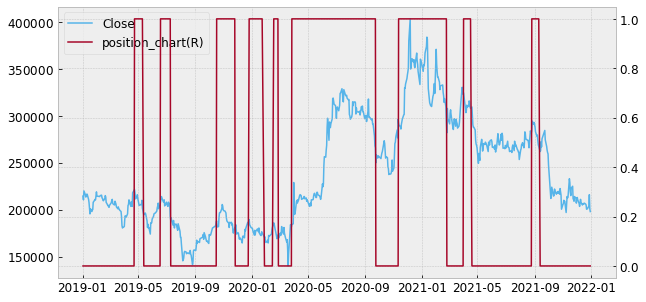

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Ma_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,
2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,-1,zero,,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,-1,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9814
2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,-1,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,-1,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9818
2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,-1,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,-1,zero,zz,0,1.0,1.0,0.725518,-27.45,0.6137,0.4981
2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,-1,zero,zz,0,1.0,1.0,0.725518,-27.45,0.6137,0.5056
2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,-1,zero,zz,0,1.0,1.0,0.725518,-27.45,0.6137,0.5353


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: -10.16%
Accumulated return: -27.45%
Average return: -2.68%
Benchmark return : -7.69%
Number of trades: 9
Number of win: 1
Hit ratio: 11.11%
Investment period: 3.0yrs
Sharpe ratio: -0.32
MDD: -38.63%
Benchmark MDD: -51.18%


## buy = -0.5, sell =0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('POSCO_19_21.csv', encoding = 'euc-kr')

In [ ]:
data

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
0,2018-07-02,303500,0,0.00,303000,311500,303000,908019,2.790520e+11,3.805770e+13,125395903
1,2018-07-03,303000,-500,-0.16,307500,308500,299000,614716,1.865190e+11,3.799500e+13,125395903
2,2018-07-04,291500,-11500,-3.80,301000,302500,290500,735433,2.171090e+11,3.655290e+13,125395903
3,2018-07-05,282000,-9500,-3.26,292500,294500,277500,1022915,2.906150e+11,3.536160e+13,125395903
4,2018-07-06,289500,7500,2.66,283000,293000,278000,767023,2.183380e+11,3.630210e+13,125395903
...,...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,204000,3000,1.49,200000,205000,199500,906195,1.839880e+11,2.814120e+13,137947128
862,2021-12-28,216000,12000,5.88,204500,216000,204000,1974215,4.169950e+11,2.979660e+13,137947128
863,2021-12-29,201000,-11000,-5.19,207500,208000,200500,1631108,3.325330e+11,2.772740e+13,137947128
864,2021-12-30,198000,-3000,-1.49,202000,202000,198000,780889,1.556390e+11,2.731350e+13,137947128


In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)
EMA(data)

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120
0,2018-07-02,303500,303000,311500,303000,908019,NaN,NaN,NaN,NaN
1,2018-07-03,303000,307500,308500,299000,614716,NaN,NaN,NaN,NaN
2,2018-07-04,291500,301000,302500,290500,735433,NaN,NaN,NaN,NaN
3,2018-07-05,282000,292500,294500,277500,1022915,NaN,NaN,NaN,NaN
4,2018-07-06,289500,283000,293000,278000,767023,293900.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000
862,2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000
863,2021-12-29,201000,207500,208000,200500,1631108,204600.0,206250.0,211883.333333,241100.000000
864,2021-12-30,198000,202000,202000,198000,780889,204000.0,205500.0,211650.000000,240529.166667


In [ ]:
def Ma_Minus_back(df):
  box = []
  for i in range(len(df)):
    if (df.iloc[i]['ma5'] > df.iloc[i]['ma20']) & (df.iloc[i]['ma5'] > df.iloc[i]['ma60']) & (df.iloc[i]['ma5'] > df.iloc[i]['ma120']):
      box.append(1)
    elif (df.iloc[i]['ma5'] < df.iloc[i]['ma20']) & (df.iloc[i]['ma5'] < df.iloc[i]['ma60']) & (df.iloc[i]['ma5'] < df.iloc[i]['ma120']):
      box.append(-1)
    else: 
      box.append(0)
  df['Ma_Score'] = box
  df = df.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)  
  return df

In [ ]:
Ma_Minus_back(data)

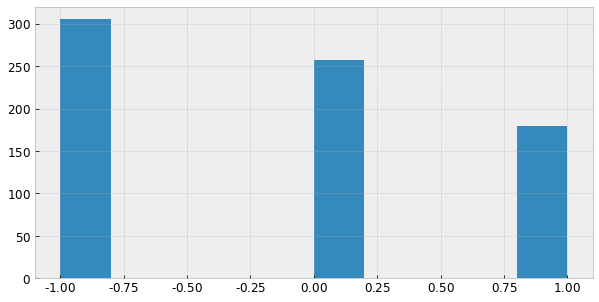

In [ ]:
import matplotlib.pyplot as plt
data['Ma_Score'].hist()

In [ ]:
import pandas as pd
data['Date'] = pd.to_datetime(data.Date)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 123 to 864
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      742 non-null    datetime64[ns]
 1   Close     742 non-null    int64         
 2   Open      742 non-null    int64         
 3   High      742 non-null    int64         
 4   Low       742 non-null    int64         
 5   Volume    742 non-null    int64         
 6   ma5       742 non-null    float64       
 7   ma20      742 non-null    float64       
 8   ma60      742 non-null    float64       
 9   ma120     742 non-null    float64       
 10  Ma_Score  742 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6)
memory usage: 69.6 KB


In [ ]:
data = data.set_index('Date')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 742 entries, 2019-01-02 to 2021-12-30
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     742 non-null    int64  
 1   Open      742 non-null    int64  
 2   High      742 non-null    int64  
 3   Low       742 non-null    int64  
 4   Volume    742 non-null    int64  
 5   ma5       742 non-null    float64
 6   ma20      742 non-null    float64
 7   ma60      742 non-null    float64
 8   ma120     742 non-null    float64
 9   Ma_Score  742 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 63.8 KB


In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Ma_Score', buy = 0.5, sell = -0.5)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24    zero
2021-12-27    zero
2021-12-28    zero
2021-12-29    zero
2021-12-30    zero
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    zz
2021-12-27    zz
2021-12-28    zz
2021-12-29    zz
2021-12-30    zz
Name: position, Length: 742, dtype: object

In [ ]:
def draw_chart(df, left=None, right=None, log=False):
    '''
    Draw chart on each y-axis
    :param df: Dataframe that contains data to plot
    :param left: Columns to use left y-axis ticks
    :param right: Columns to use right y-axis ticks
    :param log: Plot in log scale
    :return: Line chart
    '''

    fig, ax1 = plt.subplots(figsize=(30,20))
    x = df.index
    
    if left is not None:
        left = util.str_to_list(left)
        i = 6
        for c in left:
            ax1.plot(x, df[c], label=c, color='C'+str(i), alpha=1)
            i += 1
        if log:
            ax1.set_yscale('log')
            ax1.yaxis.set_major_formatter(ScalarFormatter())
            ax1.yaxis.set_minor_formatter(ScalarFormatter())
    else:
        ax1.axes.yaxis.set_visible(False)
    # secondary y
    if right is not None:
        right = util.str_to_list(right)
        ax2 = ax1.twinx()
        i = 1
        for c in right:
            ax2.plot(x, df[c], label=c+'(R)', color='C'+str(i), alpha=1)
            ax1.plot(np.nan, label=c+'(R)', color='C'+str(i))
            i += 1
        ax1.grid(False, axis='y')
        if log:
            ax2.set_yscale('log')
            ax2.yaxis.set_major_formatter(ScalarFormatter())
            ax2.yaxis.set_minor_formatter(ScalarFormatter())
    ax1.legend(loc=2)
    # plt.setp(ax1.xaxis.get

<Figure size 1800x1080 with 0 Axes>

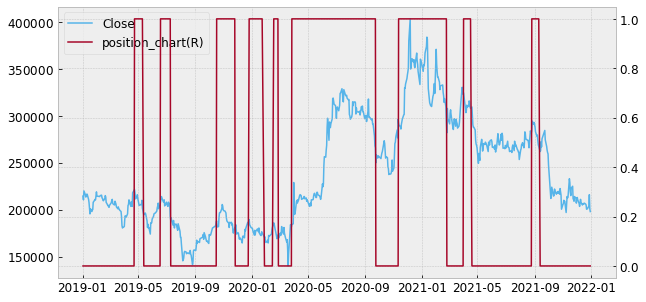

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Ma_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,
2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,-1,zero,,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,-1,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9814
2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,-1,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,-1,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9818
2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,-1,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,-1,zero,zz,0,1.0,1.0,0.725518,-27.45,0.6137,0.4981
2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,-1,zero,zz,0,1.0,1.0,0.725518,-27.45,0.6137,0.5056
2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,-1,zero,zz,0,1.0,1.0,0.725518,-27.45,0.6137,0.5353


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: -10.16%
Accumulated return: -27.45%
Average return: -2.68%
Benchmark return : -7.69%
Number of trades: 9
Number of win: 1
Hit ratio: 11.11%
Investment period: 3.0yrs
Sharpe ratio: -0.32
MDD: -38.63%
Benchmark MDD: -51.18%


# 모멘텀을 활용한 백테스팅

### buy = -0.5, sell =0.5

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('POSCO_19_21.csv', encoding = 'euc-kr')

In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)
EMA(data)

data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120
0,2018-07-02,303500,303000,311500,303000,908019,NaN,NaN,NaN,NaN
1,2018-07-03,303000,307500,308500,299000,614716,NaN,NaN,NaN,NaN
2,2018-07-04,291500,301000,302500,290500,735433,NaN,NaN,NaN,NaN
3,2018-07-05,282000,292500,294500,277500,1022915,NaN,NaN,NaN,NaN
4,2018-07-06,289500,283000,293000,278000,767023,293900.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000
862,2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000
863,2021-12-29,201000,207500,208000,200500,1631108,204600.0,206250.0,211883.333333,241100.000000
864,2021-12-30,198000,202000,202000,198000,780889,204000.0,205500.0,211650.000000,240529.166667


In [ ]:
def Momentom_5_20(data):
  data['Momentom_5'] = data['Close'].pct_change(periods = 5) * 100
  data['Momentom_20'] = data['Close'].pct_change(periods = 20) * 100
  data.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  data['Date'] = pd.to_datetime(data.Date)
  data = data.set_index('Date', inplace = True)
  return data

In [ ]:
Momentom_5_20(data)

In [ ]:
data

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,Momentom_20
Date,,,,,,,,,,,
2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,-2.500000,-10.438413
2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,0.000000,-12.474012
2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,-3.508772,-9.650924
2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,-3.139013,-10.743802
2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,-4.044944,-9.341826
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,-2.898551,-6.074766
2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,-0.970874,-4.000000
2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,5.365854,4.347826


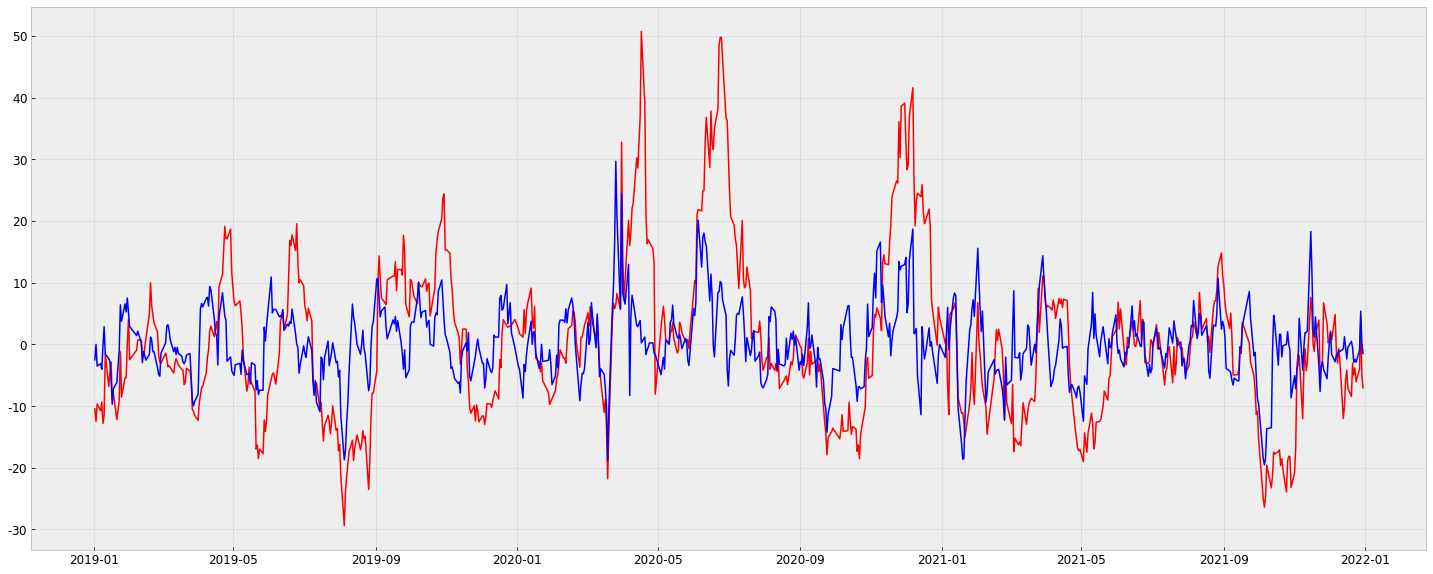

In [ ]:
# 극단적인 양수 비율(과매수)은 매도 타이밍, 음수 비율(과매도)은 매수 타이밍
plt.figure(figsize = (25,10))
plt.plot(data['Momentom_20'], color = 'red')
plt.plot(data['Momentom_5'], color = 'blue')

In [ ]:
# motentom_20 > 0 경우 매도, momentom_20 <0 경우 매수
# signal선 momentom_5를 momentom_20이 상향 돌파 경우 매수 
# signal선 momentom_5를 momentom_20이 하향 돌파 경우 매도 

def Momentom_Score_back(df):
  box = []
  for i in range(len(df)-1):
    if (df.iloc[i]['Momentom_20'] < 0) and (df.iloc[i]['Momentom_20'] < df.iloc[i]['Momentom_5']):
      if (df.iloc[i]['Momentom_20'] < df.iloc[i+1]['Momentom_20']):
        box.append(0)
      else:
        box.append(1)
    elif (df.iloc[i]['Momentom_20'] > df.iloc[i+1]['Momentom_20']):
      box.append(0)
    else :
      box.append(-1)    
  box.append(0)
  df['Momentom_Score'] = box
  return df

In [ ]:
Momentom_Score_back(data)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,Momentom_20,Momentom_Score
Date,,,,,,,,,,,,
2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,-2.500000,-10.438413,1
2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,0.000000,-12.474012,0
2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,-3.508772,-9.650924,1
2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,-3.139013,-10.743802,0
2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,-4.044944,-9.341826,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,-2.898551,-6.074766,0
2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,-0.970874,-4.000000,0
2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,5.365854,4.347826,0


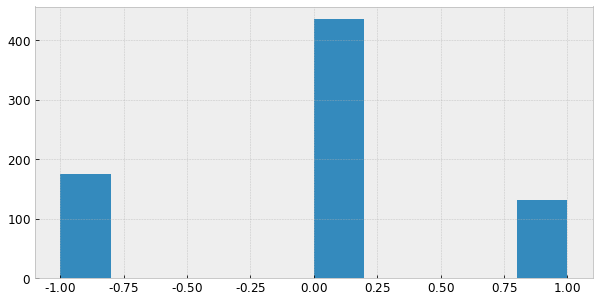

In [ ]:
data['Momentom_Score'].hist()

In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Momentom_Score', buy = -0.5, sell = 0.5)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24    zero
2021-12-27    zero
2021-12-28    zero
2021-12-29    zero
2021-12-30    zero
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    zz
2021-12-27    zz
2021-12-28    zz
2021-12-29    zz
2021-12-30    zz
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

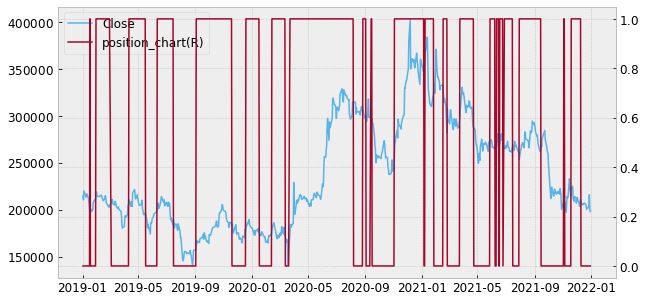

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,...,Momentom_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,-2.500000,...,1,zero,,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,0.000000,...,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9814
2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,-3.508772,...,1,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,-3.139013,...,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9818
2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,-4.044944,...,1,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,-2.898551,...,0,zero,zz,0,1.0,1.0,1.790359,79.04,0.7123,0.4981
2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,-0.970874,...,0,zero,zz,0,1.0,1.0,1.790359,79.04,0.7123,0.5056
2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,5.365854,...,0,zero,zz,0,1.0,1.0,1.790359,79.04,0.7123,0.5353


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: 21.47%
Accumulated return: 79.04%
Average return: 4.18%
Benchmark return : -7.69%
Number of trades: 21
Number of win: 8
Hit ratio: 38.10%
Investment period: 3.0yrs
Sharpe ratio: 0.47
MDD: -31.87%
Benchmark MDD: -51.18%


### buy = 0, sell = 0

In [ ]:
from Bang import Close_Minus
from Bang import EMA
from Bang import SMA
from Bang import RSI
from Bang import Index
from Bang import Rename
from Bang import RSI_Score
from Bang import Ma_Minus
from Bang import Bollinger
from Bang import MACD
from Bang import MACD_Score 
import pandas as pd


data = pd.read_csv('POSCO_19_21.csv', encoding = 'euc-kr')

In [ ]:
# 필요한 열만 추출하고 영어로 변경
Rename(data)
EMA(data)

data

,Date,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120
0,2018-07-02,303500,303000,311500,303000,908019,NaN,NaN,NaN,NaN
1,2018-07-03,303000,307500,308500,299000,614716,NaN,NaN,NaN,NaN
2,2018-07-04,291500,301000,302500,290500,735433,NaN,NaN,NaN,NaN
3,2018-07-05,282000,292500,294500,277500,1022915,NaN,NaN,NaN,NaN
4,2018-07-06,289500,283000,293000,278000,767023,293900.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
861,2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000
862,2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000
863,2021-12-29,201000,207500,208000,200500,1631108,204600.0,206250.0,211883.333333,241100.000000
864,2021-12-30,198000,202000,202000,198000,780889,204000.0,205500.0,211650.000000,240529.166667


In [ ]:
def Momentom_5_20(data):
  data['Momentom_5'] = data['Close'].pct_change(periods = 5) * 100
  data['Momentom_20'] = data['Close'].pct_change(periods = 20) * 100
  data.query("Date >= '2019-01-01' and Date <'2022-01-01'", inplace = True)
  data['Date'] = pd.to_datetime(data.Date)
  data = data.set_index('Date', inplace = True)
  return data

In [ ]:
Momentom_5_20(data)

In [ ]:
data

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,Momentom_20
Date,,,,,,,,,,,
2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,-2.500000,-10.438413
2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,0.000000,-12.474012
2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,-3.508772,-9.650924
2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,-3.139013,-10.743802
2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,-4.044944,-9.341826
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,-2.898551,-6.074766
2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,-0.970874,-4.000000
2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,5.365854,4.347826


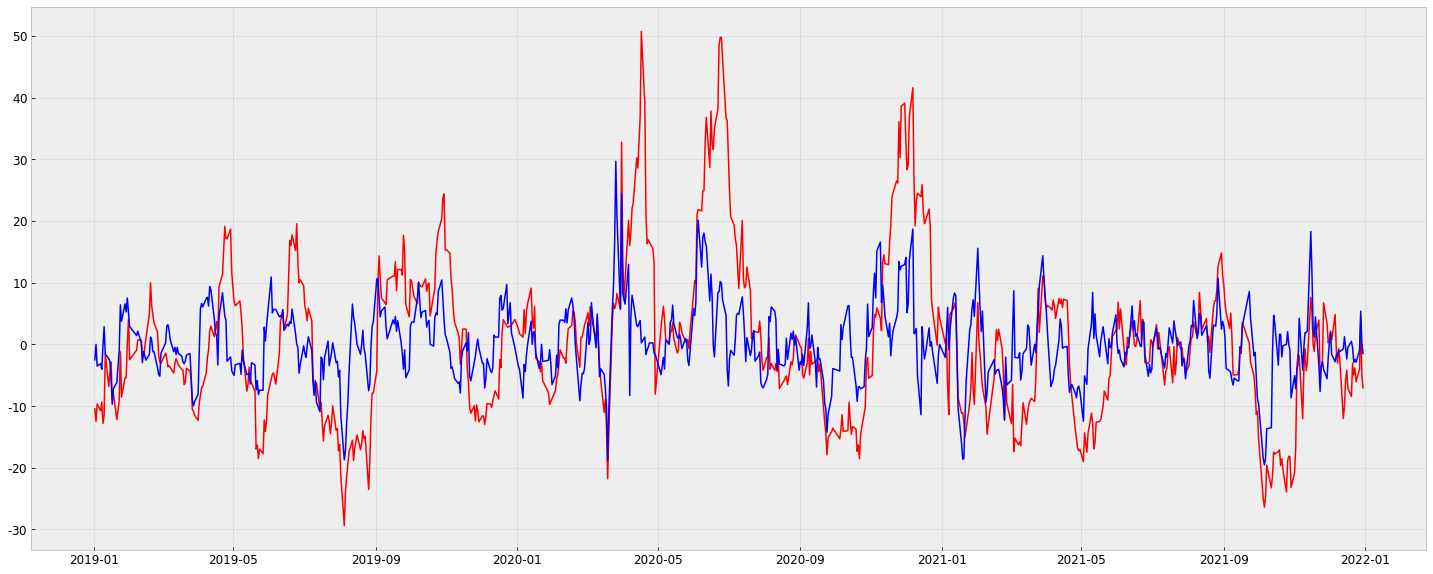

In [ ]:
# 극단적인 양수 비율(과매수)은 매도 타이밍, 음수 비율(과매도)은 매수 타이밍
plt.figure(figsize = (25,10))
plt.plot(data['Momentom_20'], color = 'red')
plt.plot(data['Momentom_5'], color = 'blue')

In [ ]:
# motentom_20 > 0 경우 매도, momentom_20 <0 경우 매수
# signal선 momentom_5를 momentom_20이 상향 돌파 경우 매수 
# signal선 momentom_5를 momentom_20이 하향 돌파 경우 매도 

def Momentom_Score_back(df):
  box = []
  for i in range(len(df)-1):
    if (df.iloc[i]['Momentom_20'] < 0) and (df.iloc[i]['Momentom_20'] < df.iloc[i]['Momentom_5']):
      if (df.iloc[i]['Momentom_20'] < df.iloc[i+1]['Momentom_20']):
        box.append(0)
      else:
        box.append(1)
    elif (df.iloc[i]['Momentom_20'] > df.iloc[i+1]['Momentom_20']):
      box.append(0)
    else :
      box.append(-1)    
  box.append(0)
  df['Momentom_Score'] = box
  return df

In [ ]:
Momentom_Score_back(data)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,Momentom_20,Momentom_Score
Date,,,,,,,,,,,,
2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,-2.500000,-10.438413,1
2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,0.000000,-12.474012,0
2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,-3.508772,-9.650924,1
2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,-3.139013,-10.743802,0
2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,-4.044944,-9.341826,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,-2.898551,-6.074766,0
2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,-0.970874,-4.000000,0
2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,5.365854,4.347826,0


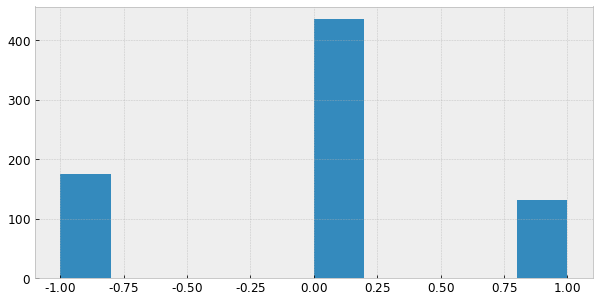

In [ ]:
data['Momentom_Score'].hist()

In [ ]:
#!pip install finterstellar
import finterstellar as fs

In [ ]:
fs.indicator_to_signal(data,factor='Momentom_Score', buy = -0.5, sell = 0.5)

Date
2019-01-02    zero
2019-01-03    zero
2019-01-04    zero
2019-01-07    zero
2019-01-08    zero
              ... 
2021-12-24    zero
2021-12-27    zero
2021-12-28    zero
2021-12-29    zero
2021-12-30    zero
Name: trade, Length: 742, dtype: object

In [ ]:
fs.position(data)

Date
2019-01-02      
2019-01-03    zz
2019-01-04    zz
2019-01-07    zz
2019-01-08    zz
              ..
2021-12-24    zz
2021-12-27    zz
2021-12-28    zz
2021-12-29    zz
2021-12-30    zz
Name: position, Length: 742, dtype: object

<Figure size 1800x1080 with 0 Axes>

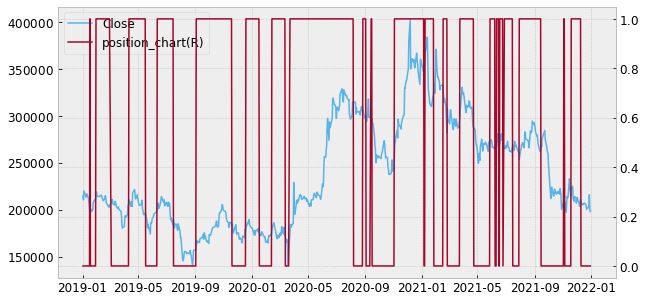

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
fs.draw_chart(data, left=['Close'], right='position_chart')
plt.show()

In [ ]:
# 거래비용
fs.evaluate(data, cost=0.0001)

,Close,Open,High,Low,Volume,ma5,ma20,ma60,ma120,Momentom_5,...,Momentom_Score,trade,position,position_chart,rtn,daily_rtn,acc_rtn,acc_rtn_dp,mdd,bm_mdd
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,214500,224500,226000,213000,1045357,219700.0,226225.0,235675.000000,257170.833333,-2.500000,...,1,zero,,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-03,210500,214000,217500,208500,951894,219700.0,224725.0,234366.666667,256512.500000,0.000000,...,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9814
2019-01-04,220000,210500,221000,208000,1132255,218100.0,223550.0,233200.000000,255979.166667,-3.508772,...,1,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,1.0000
2019-01-07,216000,227000,227000,215000,1071752,216700.0,222250.0,232025.000000,255437.500000,-3.139013,...,0,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9818
2019-01-08,213500,216500,219000,212500,646883,214900.0,221150.0,231058.333333,254912.500000,-4.044944,...,1,zero,zz,0,1.0,1.0,1.000000,0.00,1.0000,0.9705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,201000,201000,203500,201000,394428,202700.0,206750.0,213625.000000,242641.666667,-2.898551,...,0,zero,zz,0,1.0,1.0,1.790359,79.04,0.7123,0.4981
2021-12-27,204000,200000,205000,199500,906195,202300.0,206325.0,212700.000000,242125.000000,-0.970874,...,0,zero,zz,0,1.0,1.0,1.790359,79.04,0.7123,0.5056
2021-12-28,216000,204500,216000,204000,1974215,204500.0,206775.0,212166.666667,241650.000000,5.365854,...,0,zero,zz,0,1.0,1.0,1.790359,79.04,0.7123,0.5353


In [ ]:
# 무위험 수익률
fs.performance(data, rf_rate=0.02)

CAGR: 21.47%
Accumulated return: 79.04%
Average return: 4.18%
Benchmark return : -7.69%
Number of trades: 21
Number of win: 8
Hit ratio: 38.10%
Investment period: 3.0yrs
Sharpe ratio: 0.47
MDD: -31.87%
Benchmark MDD: -51.18%
